In [1]:
from weidmd import WeiDMD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
import warnings
warnings.filterwarnings("ignore")

$$ \dot{P_D}{(t)} = -\int_0^t dt' \, k(t-t')P_D{(t')} +\int_0^t dt' \, k(t-t')(1-P_D{(t')})$$

In [3]:
data_deom = np.loadtxt('prop-rho-eq.dat')
pd_deom = data_deom[:,1]

In [4]:
kai_DD = np.loadtxt('prop-rho-eq1-DD.dat_0_1_0.02_5_4_1_0')
kai_AD = np.loadtxt('prop-rho-eq1-AD.dat_0_1_0.02_5_4_1_0')

In [5]:
time = kai_DD[:,0]
kai = kai_DD[:,3]
kai_p = kai_AD[:,1]

In [20]:
num_snapshots=60

In [21]:
DMD = WeiDMD(time,kai,num_snapshots=num_snapshots)

(0.0, 10.0)

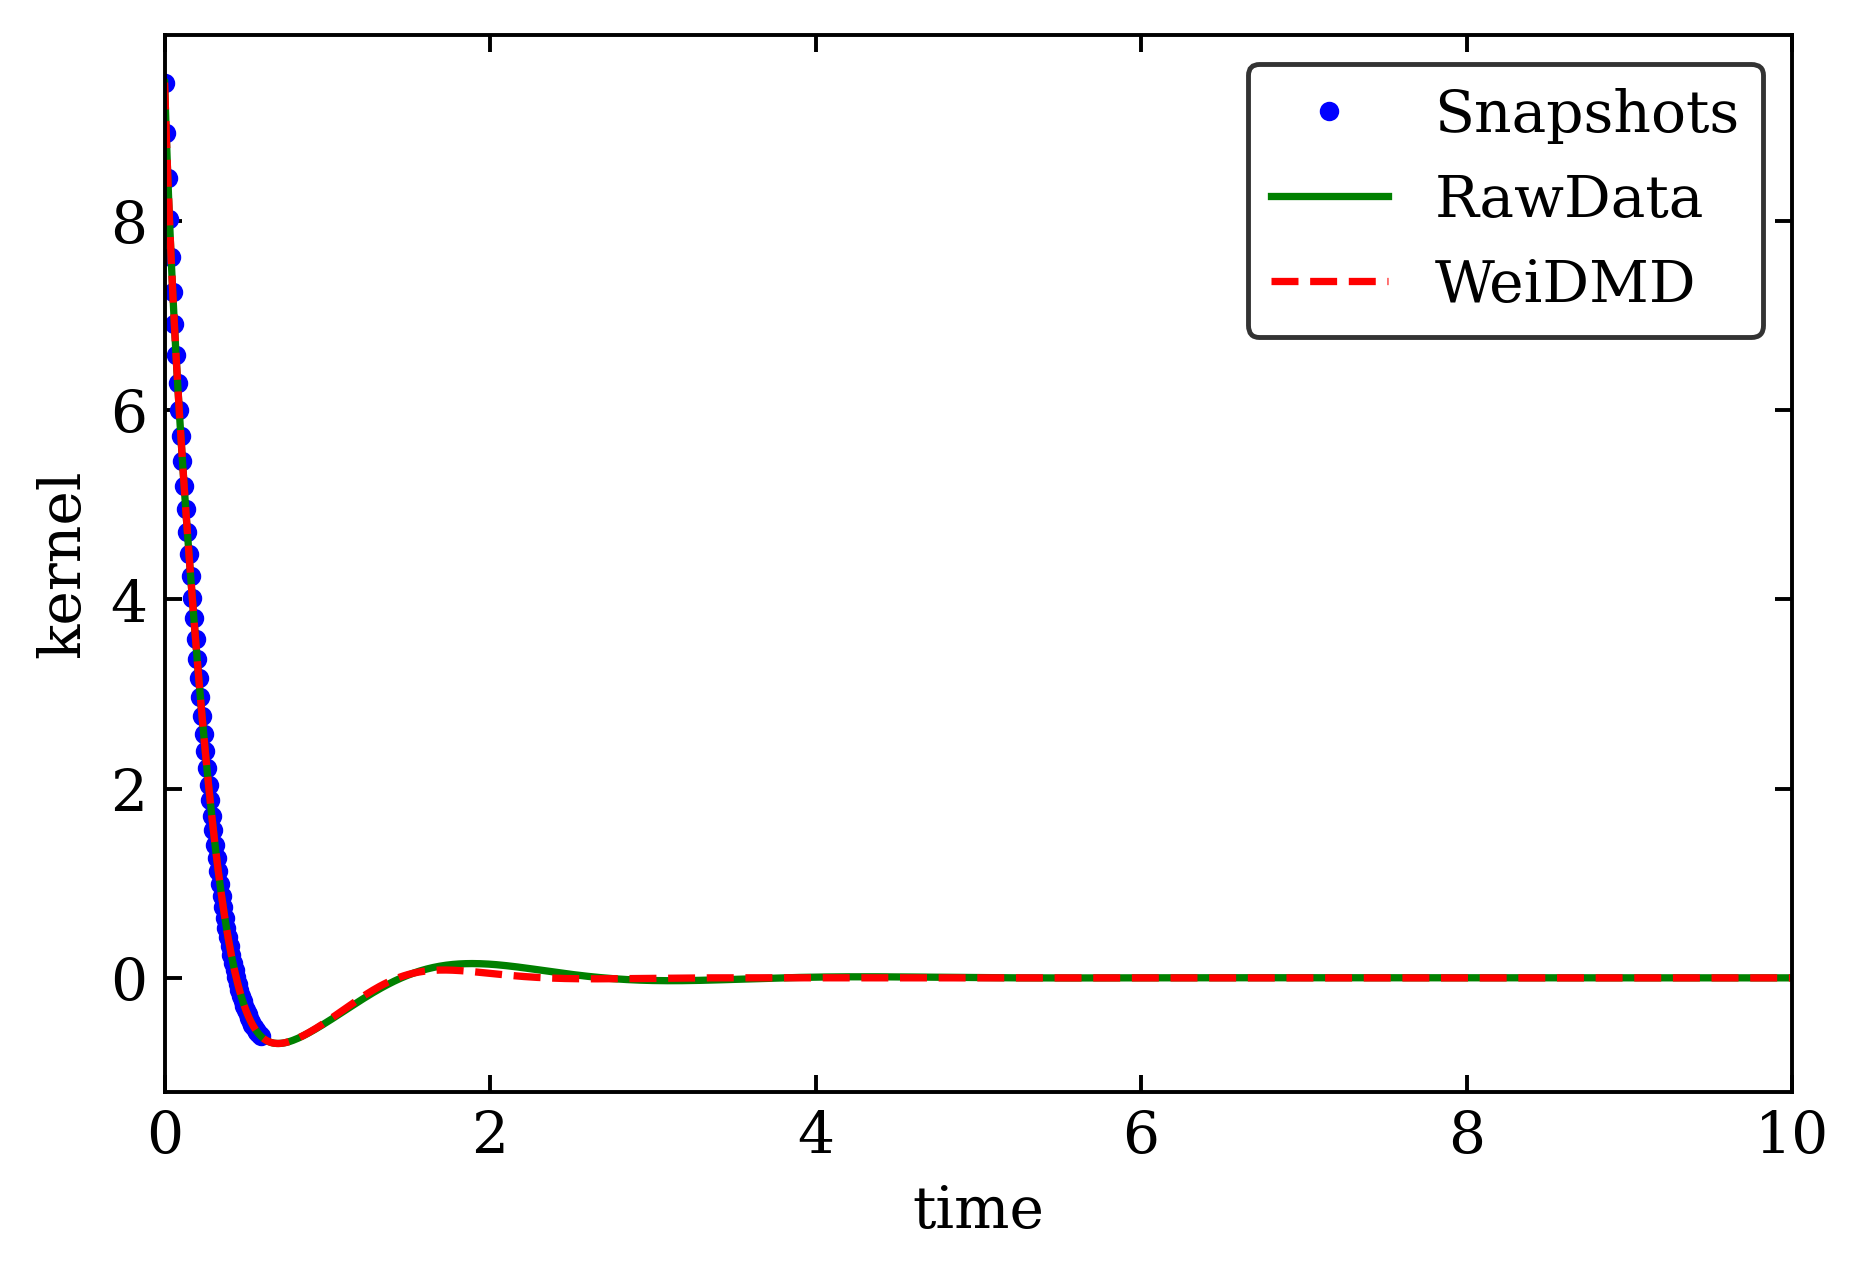

In [26]:
plt.figure(dpi=350)
DMD.fit(tf=10,name='kai_DD',d=20)
plt.xlim(0,10)

(0.0, 10.0)

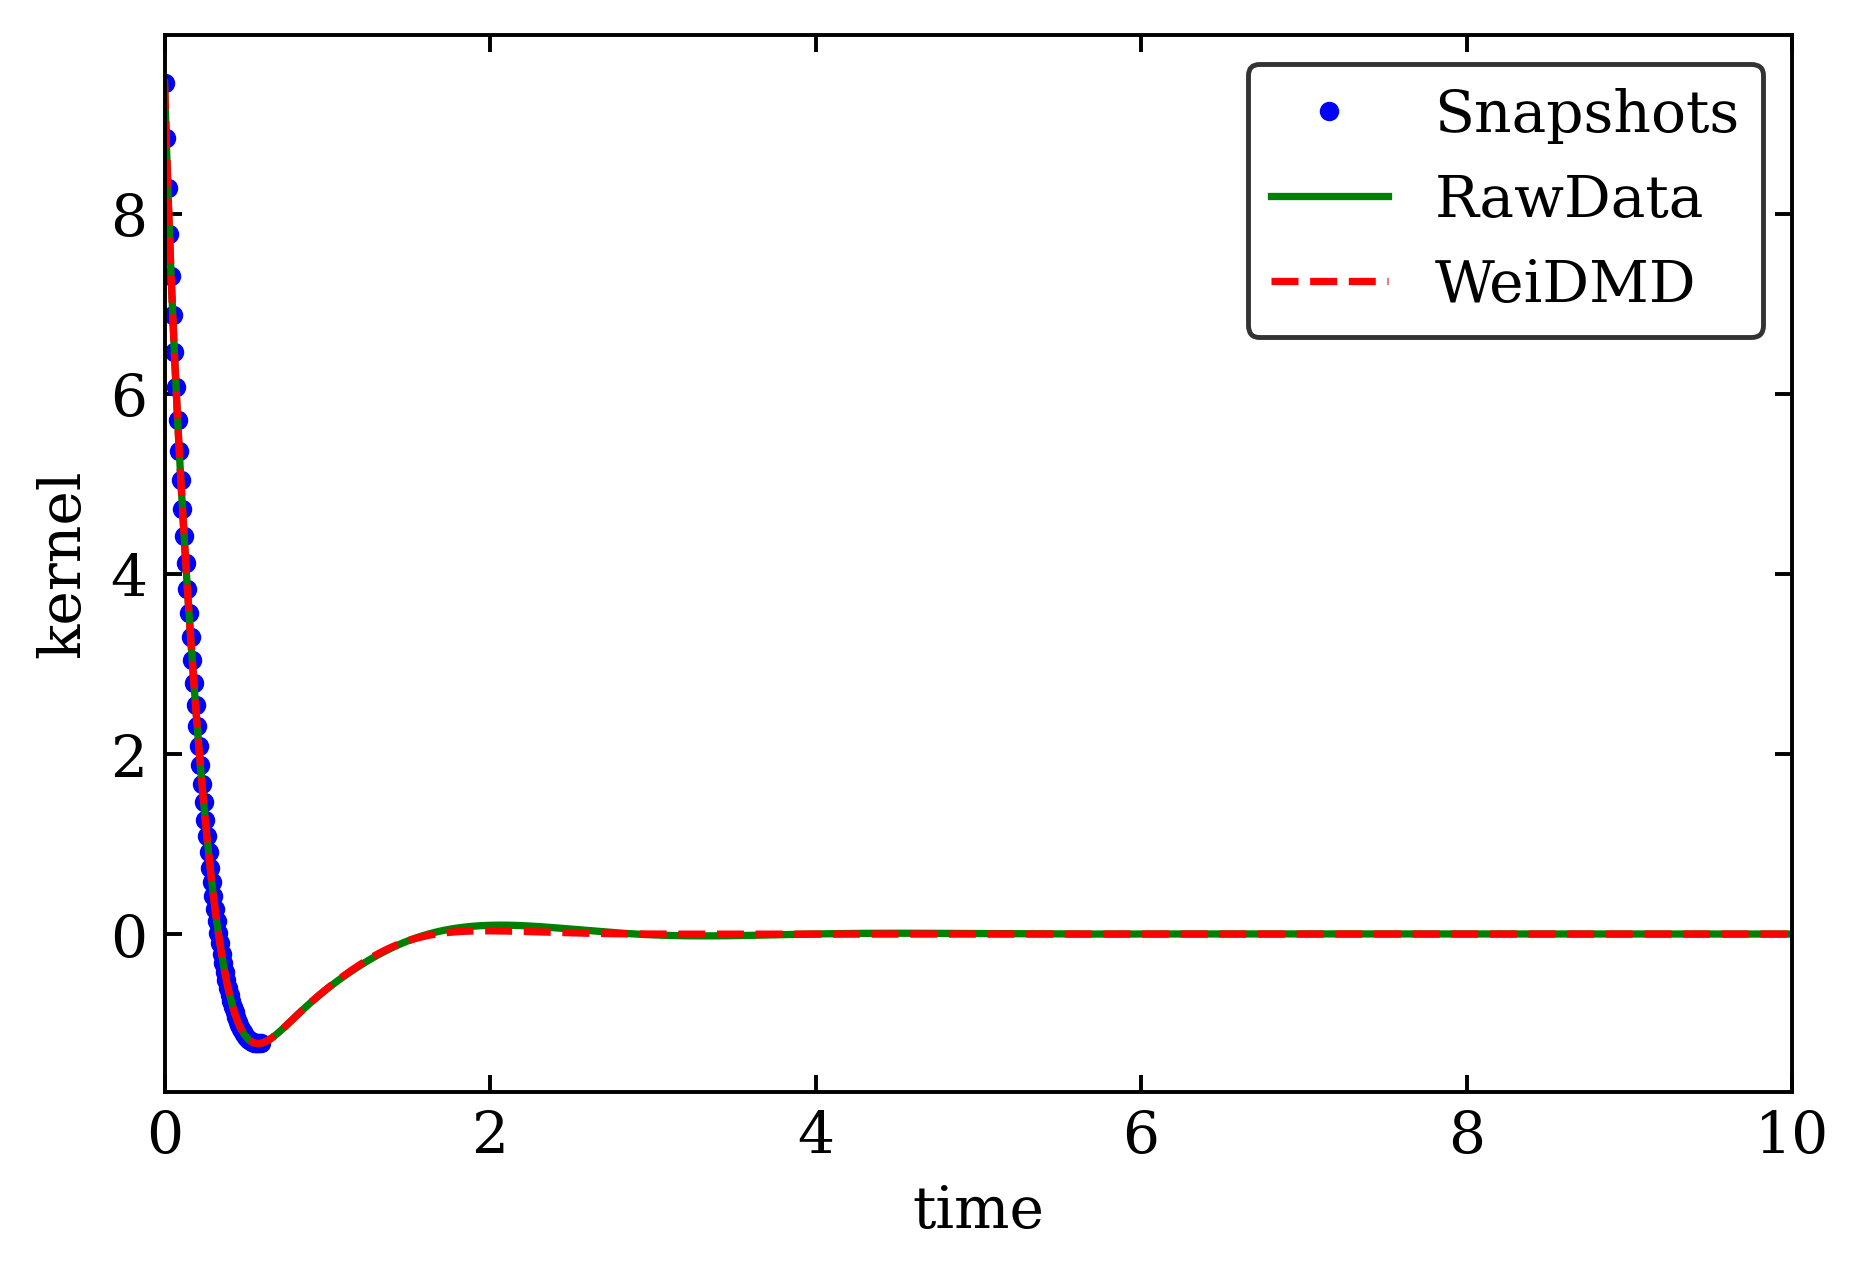

In [27]:
DMD = WeiDMD(time,kai_p,num_snapshots=num_snapshots)
plt.figure(dpi=350)
DMD.fit(tf=10,name='kai_AD',d=20)
plt.xlim(0,10)

In [34]:
time  = np.load('./DMD_results/time_kai_DD.npy')
kai   = np.load('./DMD_results/kernel_kai_DD.npy')
kai_p = np.load('./DMD_results/kernel_kai_AD.npy')
dt = time[1]-time[0]
P_Donor = np.array([1])

In [35]:
for t in range(len(kai)):
    # print(t)
    plast = P_Donor[-1]
    d = integrate.simpson(np.flip(kai[:t+1]) * P_Donor[:t+1], time[:t+1])
    # d = np.dot(np.flip(kai[:t+1]), P_Donor[:t+1])*dt
    P_acc = 1 - P_Donor[:t+1]
    a = integrate.simpson(np.flip(kai_p[:t+1]) * P_acc[:t+1], time[:t+1])
    # a = np.dot(np.flip(kai[:t+1]), P_acc)*dt
    pnew = plast + dt * (a-d)
    P_Donor = np.append(P_Donor, pnew)

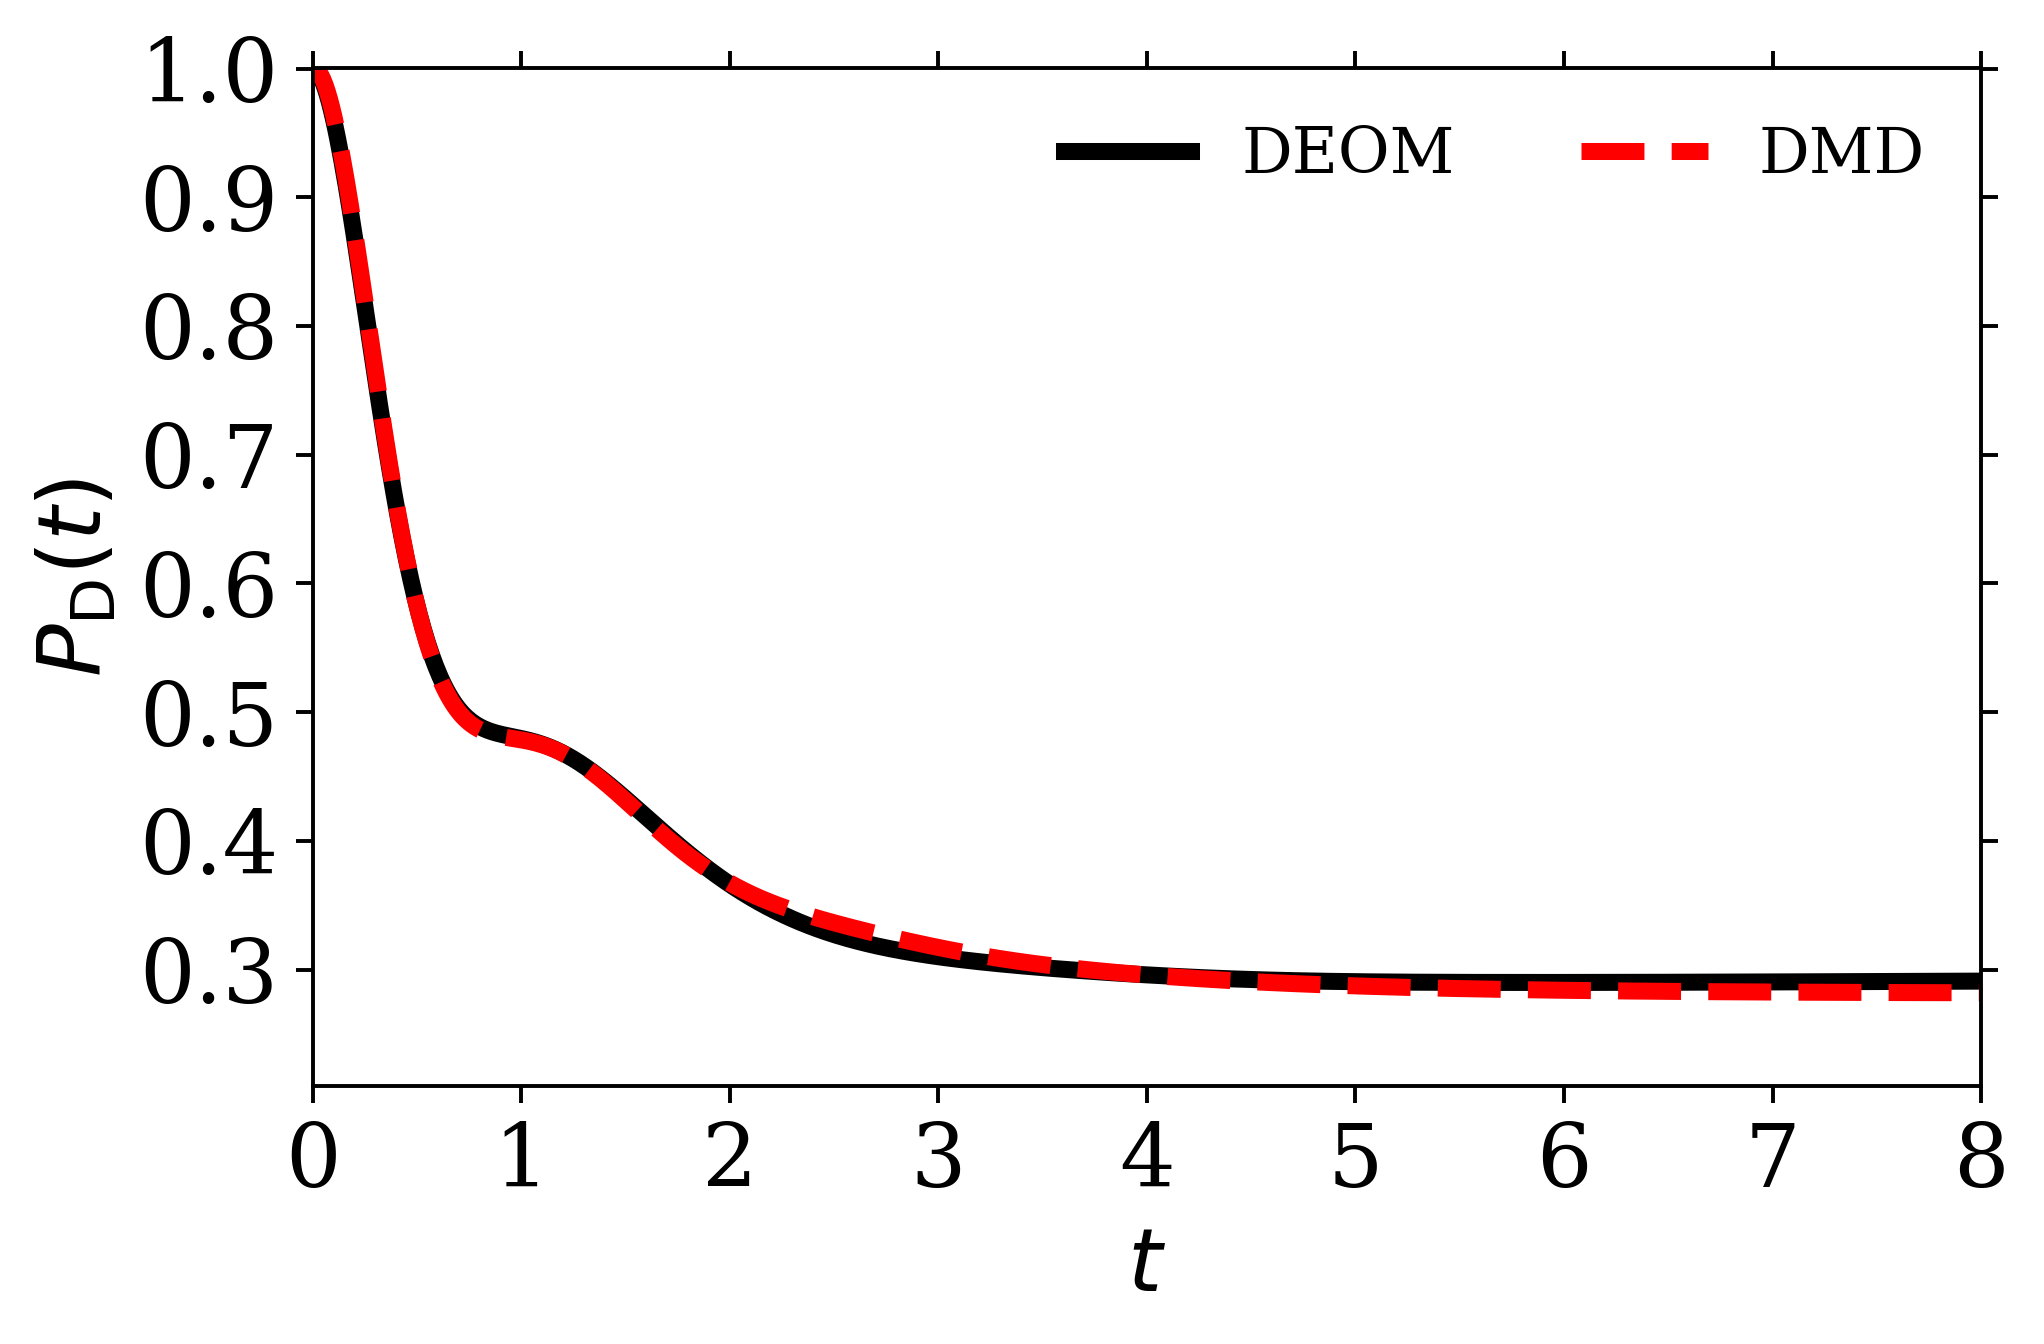

In [39]:
plt.figure(figsize=(6, 4),dpi=350)
plt.plot(time, pd_deom[:len(time)], c='black', lw=3.5, label='DEOM')
plt.plot(time, P_Donor[:len(time)], c='r', ls ='--', lw=3.5,label='DMD')

plt.xlim(0, 8)
plt.ylim(0.21, 1)
SX = 18
SX_tick = 18
# plt.ylim(0, 1.1)
plt.xticks(fontsize=SX_tick)
plt.yticks(fontsize=SX_tick)
plt.xlabel(r'$t$',fontsize=SX)
plt.ylabel(r'$P_{\mathrm{D}}(t)$',fontsize=SX)
# plt.text(3.5,0.6,r'$t_s=$'+' {}'.format(k2/100),fontsize=SX-1)
plt.tick_params(top=True,right=True)
plt.tick_params(top=True,right=True)
plt.legend(frameon=False,ncol=3,fontsize=13)
# plt.rc('font',family='serif', size=12)
plt.tight_layout()